In [76]:
import tushare as ts
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
import numpy as np
import talib as talib
import pandas as pd
import datetime as dt

#取所有2n天内的低点
def get_low_point(df,columns,n):
    conds = (df[columns]==df[columns])
    for i in range(0,n):
        conds = conds & (df[columns].shift(i+1)>=df[columns]) &  (df[columns].shift(-i-1)>=df[columns])  
    return df[conds] 

#取所有2n天内的高点
def get_high_point(df,columns,n):
    conds = (df[columns]==df[columns])
    for i in range(0,n):
        conds = conds & (df[columns].shift(i+1)<=df[columns]) &  (df[columns].shift(-i-1)<=df[columns])  
    return df[conds]

data = ts.get_k_data('002023', ktype='m',autype="qfq",index=False,start='2001-01-01', end='2018-05-15')
#RSI
data["rsi"] = talib.RSI(data['close'].values, timeperiod=9)

<urlopen error timed out>
<urlopen error timed out>


In [113]:
#取底背离点
def get_low_beili(df,columns1, columns2):
    return df[ (df[columns1].shift(1)>df[columns1]) & (df[columns2].shift(1)<df[columns2])  ]

def get_high_beili(df,columns1, columns2):
    return df[ (df[columns1].shift(1)<df[columns1]) & (df[columns2].shift(1)>df[columns2])  ]

k_LowPoint= get_low_point(data,"low",2).dropna()
low_dest = get_low_beili(k_LowPoint,"low","rsi")

low_dest


,date,open,close,high,low,volume,code,rsi
101,2012-12-31,4.002,4.571,4.591,3.744,907748.0,002023,46.077176
140,2016-03-31,12.553,15.711,16.503,11.831,3303322.0,002023,50.349510
163,2018-02-28,9.360,9.390,9.750,7.700,1898272.0,002023,33.807075


In [115]:
k_heightPoint= get_high_point(data,"high",2).dropna()
high_dest = get_high_beili(k_heightPoint,"high","rsi")
high_dest

,date,open,close,high,low,volume,code,rsi
76,2010-11-30,8.754,7.638,9.951,7.466,2349035.0,002023,62.170239
115,2014-02-28,8.147,8.235,9.539,7.847,1221238.0,002023,64.477958


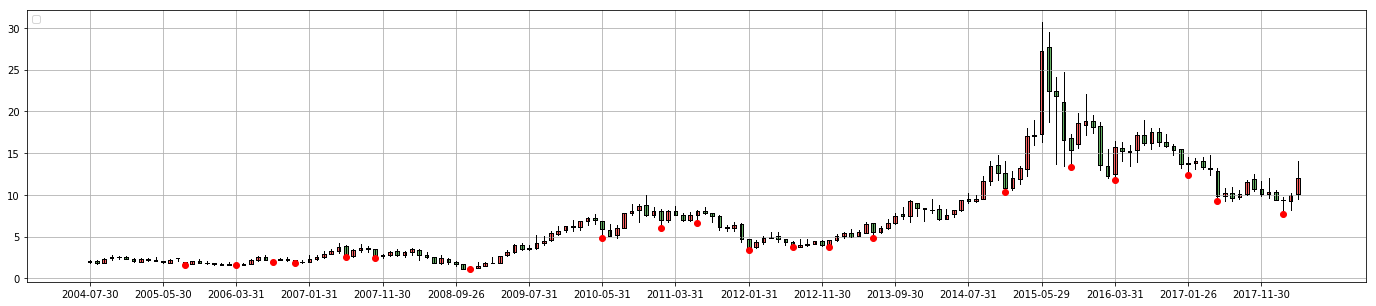

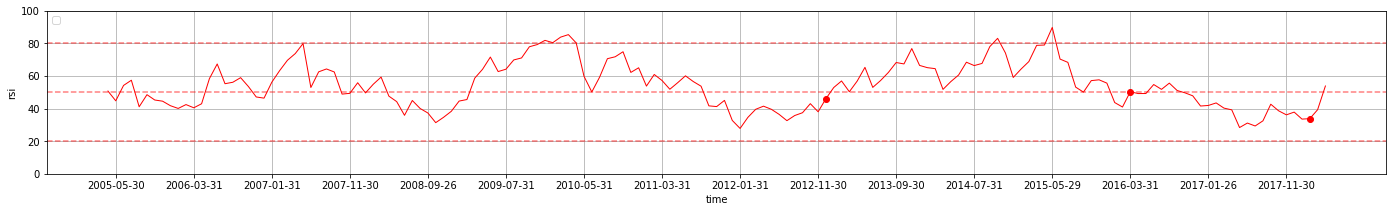

In [117]:
 #绘制K线图
 
fig = plt.figure(figsize=(24, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(data['date']), 10))
ax.set_xticklabels(data['date'][::10])
ax.legend(loc='upper left')

mpf.candlestick2_ochl(ax, data['open'], data['close'], data['high'], data['low'],width=0.5, colorup='r', colordown='green',alpha=0.6)
plt.grid()
#画出低点
plt.plot(k_LowPoint.index, k_LowPoint["low"],'o',color='red')

#绘制RSI线图
fig2,ax2 = plt.subplots(figsize=(24,3)) 
#设置坐标轴范围
plt.xlabel('time')
plt.ylabel('rsi')
ax2.set_xticks(range(0, len(data['date']), 10))
ax2.set_xticklabels(data['date'][::10]) 
ax2.legend(loc='upper left')
#设置坐标轴范围
#plt.xlim((-5, 5))
plt.ylim((0, 100))
plt.grid()
plt.plot(data["date"],data["rsi"],color='red', linewidth=1.0, linestyle='-')
plt.axhline(80,alpha=0.5,color='red',linestyle='--') 
plt.axhline(50,alpha=0.5,color='red',linestyle='--') 
plt.axhline(20,alpha=0.5,color='red',linestyle='--') 



#画出底背离低点
plt.plot(low_dest.index, low_dest["rsi"],'o',color='red') 